In [20]:
import pandas as pd

In [21]:
pd.set_option('display.float_format', lambda x: '%.7f' % x)

In [22]:
asset_details = pd.read_csv("g-research-crypto-forecasting/asset_details.csv")

In [23]:
asset_details.head()

,Asset_ID,Weight,Asset_Name
0,2,2.3978953,Bitcoin Cash
1,0,4.3040651,Binance Coin
2,1,6.7799219,Bitcoin
3,5,1.3862944,EOS.IO
4,7,2.0794415,Ethereum Classic


In [24]:
train = pd.read_csv("g-research-crypto-forecasting/train.csv")

In [25]:
train.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0000000,2376.5800000,2399.5000000,2357.1400000,2374.5900000,19.2330052,2373.1163915,-0.0042182
1,1514764860,0,5.0000000,8.5300000,8.5300000,8.5300000,8.5300000,78.3800000,8.5300000,-0.0143990
2,1514764860,1,229.0000000,13835.1940000,14013.8000000,13666.1100000,13850.1760000,31.5500615,13827.0620927,-0.0146432
3,1514764860,5,32.0000000,7.6596000,7.6596000,7.6567000,7.6576000,6626.7133699,7.6577129,-0.0139224
4,1514764860,7,5.0000000,25.9200000,25.9200000,25.8740000,25.8770000,121.0873100,25.8913630,-0.0082635


In [26]:
train["Change"] = train["Open"] - train["Close"]

train_means = train.groupby("Asset_ID", as_index=False) \
                  .mean()[["Asset_ID", "Count", "Change"]]

In [27]:
train_highlights = train_means.merge(asset_details,on="Asset_ID")

In [28]:
train_highlights

,Asset_ID,Count,Change,Weight,Asset_Name
0,0,186.4472019,0.0001079,4.3040651,Binance Coin
1,1,1082.3901212,-0.0003495,6.7799219,Bitcoin
2,2,153.5601353,0.0040191,2.3978953,Bitcoin Cash
3,3,239.3498597,-0.0000001,4.4067192,Cardano
4,4,474.8136586,0.0000001,3.5553481,Dogecoin
5,5,245.5706543,0.0000115,1.3862944,EOS.IO
6,6,689.1085549,-0.0010080,5.8944028,Ethereum
7,7,129.5688635,-0.0000347,2.0794415,Ethereum Classic
8,8,33.4852328,0.0000015,1.0986123,IOTA
9,9,225.6684310,0.0000249,2.3978953,Litecoin


In [29]:
# train[train["Asset_ID"] == 1] \
#      .plot(x="timestamp", y="open")

In [30]:
train_bitcoin = train[train["Asset_ID"] == 1] \
                    .sort_values("timestamp").head(10000)

In [31]:
train_bitcoin.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Change
2,1514764860,1,229.0000000,13835.1940000,14013.8000000,13666.1100000,13850.1760000,31.5500615,13827.0620927,-0.0146432,-14.9820000
10,1514764920,1,235.0000000,13835.0360000,14052.3000000,13680.0000000,13828.1020000,31.0464321,13840.3625915,-0.0150365,6.9340000
18,1514764980,1,528.0000000,13823.9000000,14000.4000000,13601.0000000,13801.3140000,55.0618201,13806.0680136,-0.0103087,22.5860000
26,1514765040,1,435.0000000,13802.5120000,13999.0000000,13576.2800000,13768.0400000,38.7805295,13783.5981009,-0.0089993,34.4720000
34,1514765100,1,742.0000000,13766.0000000,13955.9000000,13554.4400000,13724.9140000,108.5016369,13735.5868419,-0.0080794,41.0860000


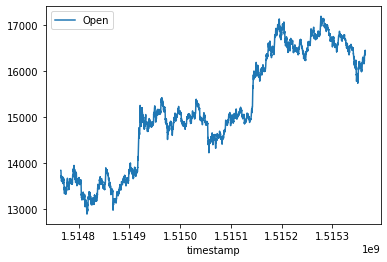

In [32]:
train_bitcoin.plot(x="timestamp", y="Open")

In [33]:
bitcoin = train[train["Asset_ID"] == 1]

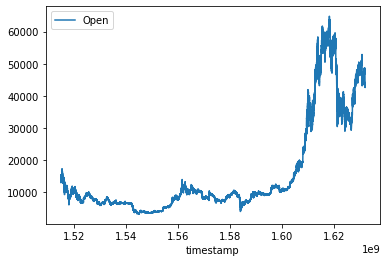

In [34]:
bitcoin.plot(x="timestamp", y="Open")

In [35]:
bitcoin["Percentage_Change"] = (bitcoin["Close"] / bitcoin["Open"] - 1) * 100

bitcoin.sort_values("timestamp") \
       .head(100)[["timestamp", "Open", "Close", "Percentage_Change"]]

/Users/lukekirwan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,timestamp,Open,Close,Percentage_Change
2,1514764860,13835.1940000,13850.1760000,0.1082890
10,1514764920,13835.0360000,13828.1020000,-0.0501191
18,1514764980,13823.9000000,13801.3140000,-0.1633837
26,1514765040,13802.5120000,13768.0400000,-0.2497516
34,1514765100,13766.0000000,13724.9140000,-0.2984600
...,...,...,...,...
734,1514770560,13578.4520000,13583.1020000,0.0342454
742,1514770620,13575.4300000,13573.4940000,-0.0142611
750,1514770680,13570.3900000,13576.7240000,0.0466752
758,1514770740,13575.8920000,13566.4320000,-0.0696823
